<a href="https://colab.research.google.com/github/mounikayacham/Machine_Learning_Projects/blob/main/ML_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



# ML Algorithms  we Can Use (Regression Models) for the diabetes model
Algorithm	Scikit-learn Class
1.  Linear Regression-	LinearRegression()
2.  Ridge Regression	-Ridge()
3. Lasso Regression-	Lasso()
4.  Decision Tree Regressor-	DecisionTreeRegressor()
5.  Random Forest Regressor-	RandomForestRegressor()
6. Gradient Boosting Regressor- GradientBoostingRegressor()
7. Support Vector Regressor-	SVR()
8. KNN Regressor- 	KNeighborsRegressor()

-

In [32]:
data=load_diabetes()
X=data.data
y=data.target
data = load_diabetes(as_frame=True)

df = data.frame


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [16]:
Scalar=StandardScaler()
X_train_scaled = Scalar.fit_transform(X_train)
X_test_scaled = Scalar.fit_transform(X_test)

In [19]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "SVR": SVR()
}

In [20]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2])
    print(f"{name}: MSE = {mse:.2f}, R² = {r2:.2f}")


LinearRegression: MSE = 2900.19, R² = 0.45
Ridge: MSE = 3077.42, R² = 0.42
Lasso: MSE = 3403.58, R² = 0.36
DecisionTree: MSE = 5098.28, R² = 0.04
RandomForest: MSE = 2911.66, R² = 0.45
GradientBoosting: MSE = 2930.71, R² = 0.45
SVR: MSE = 4333.29, R² = 0.18


In [21]:
results_df = pd.DataFrame(results, columns=["Model", "MSE", "R2_Score"])
print("\nComparison Table:\n", results_df)



Comparison Table:
               Model          MSE  R2_Score
0  LinearRegression  2900.193628  0.452603
1             Ridge  3077.415939  0.419153
2             Lasso  3403.575722  0.357592
3      DecisionTree  5098.280899  0.037725
4      RandomForest  2911.659064  0.450439
5  GradientBoosting  2930.707716  0.446843
6               SVR  4333.285955  0.182114


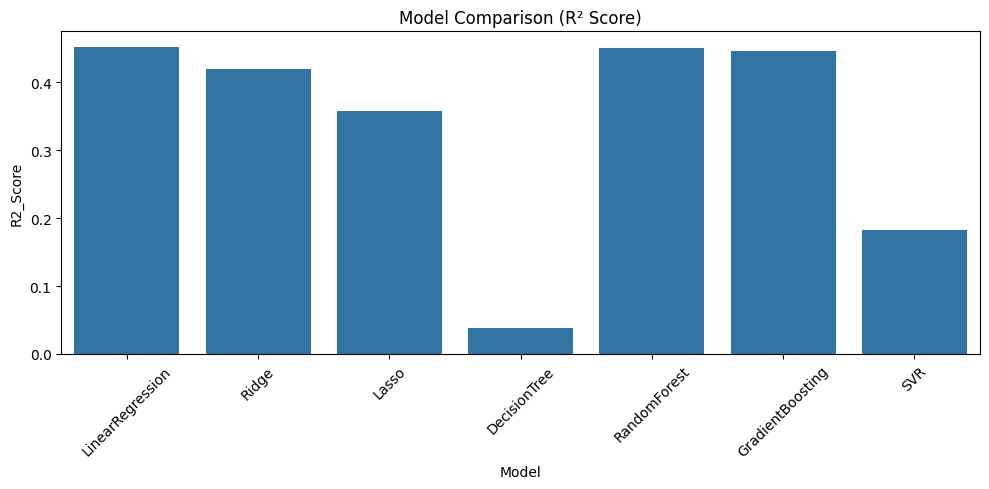

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="R2_Score")
plt.title("Model Comparison (R² Score)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("r2_scores.png")  # Save for GitHub
plt.show()


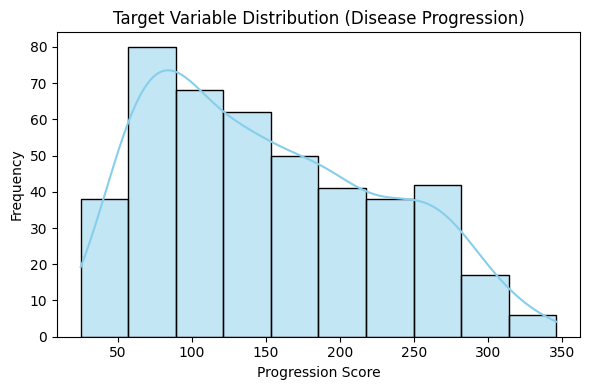

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True, color='skyblue')
plt.title("Target Variable Distribution (Disease Progression)")
plt.xlabel("Progression Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("target_distribution.png")
plt.show()


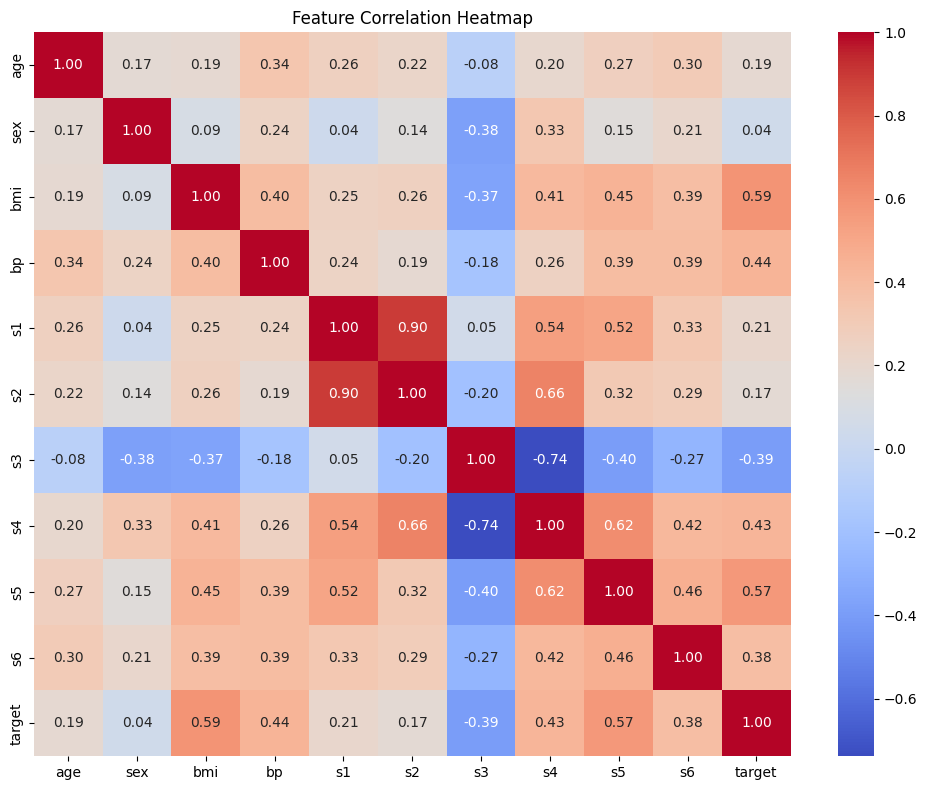

In [33]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()


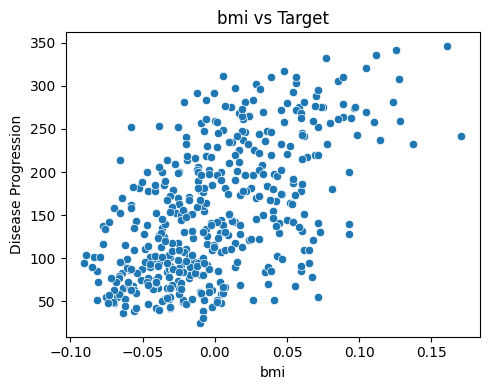

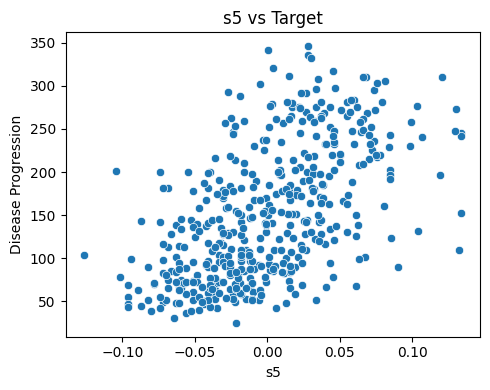

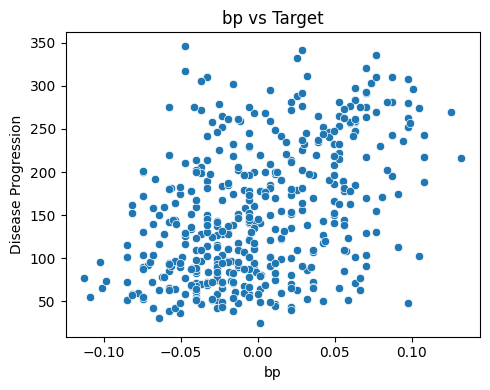

In [34]:
top_features = corr_matrix['target'].abs().sort_values(ascending=False)[1:4].index
for feature in top_features:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=df[feature], y=df['target'])
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel("Disease Progression")
    plt.tight_layout()
    plt.savefig(f"{feature}_vs_target.png")
    plt.show()


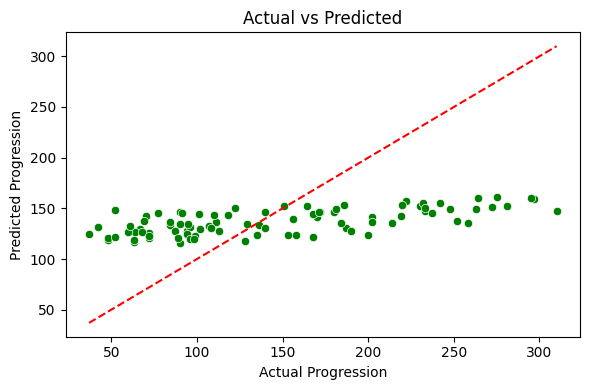

In [35]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("Actual Progression")
plt.ylabel("Predicted Progression")
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.savefig("actual_vs_predicted.png")
plt.show()


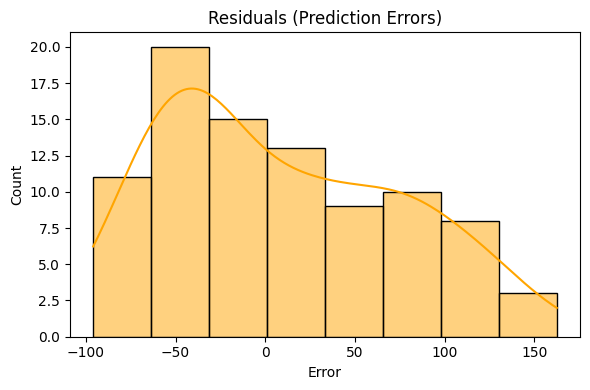

In [36]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Residuals (Prediction Errors)")
plt.xlabel("Error")
plt.tight_layout()
plt.savefig("residual_plot.png")
plt.show()


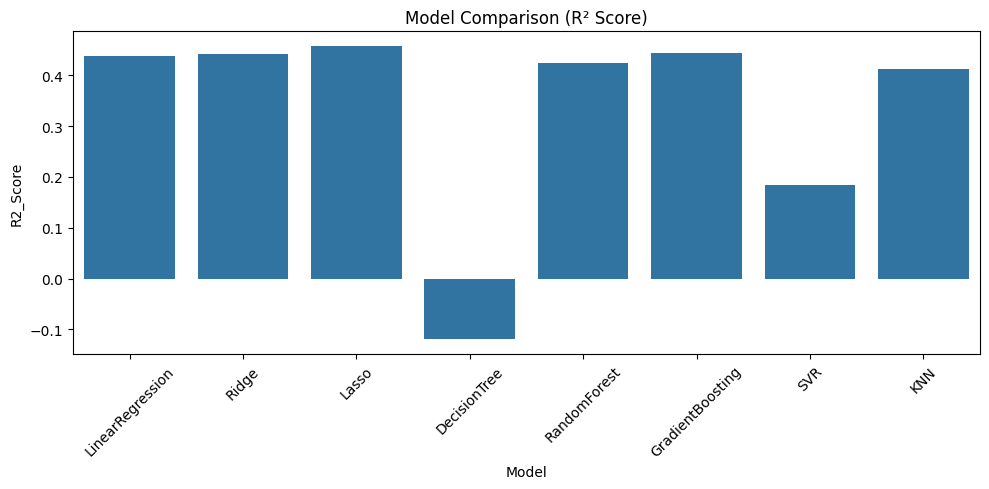

In [38]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

results = []
for name, m in models.items():
    m.fit(X_train_scaled, y_train)
    y_p = m.predict(X_test_scaled)
    r2 = r2_score(y_test, y_p)
    mse = mean_squared_error(y_test, y_p)
    results.append([name, r2, mse])

results_df = pd.DataFrame(results, columns=["Model", "R2_Score", "MSE"])
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="R2_Score")
plt.title("Model Comparison (R² Score)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("model_comparison_r2.png")
plt.show()


# why only Regression
1. The value we're predicting (e.g., disease progression) is a real number like 150.2, not a category like "Yes" or "No".
  *Classification models can only handle discrete classes, not continuous numbers.*
2. Regression answers "How much?" or "What is the value?"

  Example: "How much will a patient’s diabetes progress?" → This requires a numerical answer.
3. In problems like diabetes prediction, each patient's result is different and unique.
   *Classification would try to group them into fixed labels, which loses accuracy.*
4. Regression uses metrics like Mean Squared Error (MSE) to minimize how far off the prediction is from the real value.
  *Classification uses accuracy, which isn't meaningful when the output is continuous.*







